# King county home sales analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50


import geopandas as gpd
from shapely.geometry import Point, Polygon
from descartes import PolygonPatch


from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error as mse 
from sklearn.model_selection import cross_val_score

In [2]:
def col_rename(df, dict_rules, ip=True):
    ''' rename columns in data frame using a dictionary of rules  '''
    if isinstance(df,pd.core.frame.DataFrame) and isinstance(dict_rules,dict):
        z = df.rename(columns = dict_rules, inplace=ip)
    else:
        raise TypeError
    return z
#
def print_unique(df,col):
    ''' gives a list of unique values in a field '''
    if isinstance(df,pd.core.frame.DataFrame) and isinstance(df[col],pd.core.frame.Series):
        z = df[col].unique()
    else:
        raise TypeError
    return z

In [3]:
df = pd.read_csv("kc_house_data.csv")

# Examining the DataFrame

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Check for nan values

In [6]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [7]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Value counts for all columns

In [8]:
for col in df.columns:  
    print(col, '\n', pd.concat([df[col].value_counts(normalize=True).head(20), df[col].value_counts().head(20)],axis=1,keys=('fractional %','count')),
    '\n Min:', df[col].min(), '  Max:', df[col].max(), 
    'Unique Values:', df[col].nunique(),'\n')

id 
             fractional %  count
795000620       0.000139      3
8651510380      0.000093      2
2568300045      0.000093      2
9353300600      0.000093      2
4139480200      0.000093      2
1954420170      0.000093      2
6381500170      0.000093      2
7167000040      0.000093      2
9407110710      0.000093      2
1000102         0.000093      2
1781500435      0.000093      2
4139420590      0.000093      2
2621600015      0.000093      2
5083000375      0.000093      2
1788800630      0.000093      2
7230400400      0.000093      2
1231000510      0.000093      2
7520000520      0.000093      2
7657000540      0.000093      2
4364700600      0.000093      2 
 Min: 1000102   Max: 9900000190 Unique Values: 21436 

date 
                  fractional %  count
20140623T000000      0.006570    142
20140626T000000      0.006061    131
20140625T000000      0.006061    131
20140708T000000      0.005876    127
20150427T000000      0.005830    126
20150325T000000      0.005691    123
2

#Finding uniuque value of zip code

In [9]:
uniqueValues = (df['zipcode'].append(df['zipcode'])).unique()
print(uniqueValues)

[98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]


/var/folders/lj/my6r3k650wl54v5nz5r6x5cm0000gn/T/ipykernel_54797/1885137836.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  uniqueValues = (df['zipcode'].append(df['zipcode'])).unique()


The label takes care of identifications so we can remove 'id'. We also chose to remove date sold and year renovated.

In [10]:
#Finding null value of bathroom

In [11]:
df[df['bathrooms']==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,20150413T000000,139950.0,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [12]:
df.date = df.date.str[0:4]

In [13]:
df.date = df.date.astype('int')
df.date

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: date, Length: 21613, dtype: int64

# Price variation across region

In [14]:
df['price_sqft'] = df['price']/df['sqft_living']

In [15]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft
count,2.161300e+04,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014.322954,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,264.156594
std,2.876566e+09,0.467616,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,110.060793
min,1.000102e+06,2014.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,87.588235
25%,2.123049e+09,2014.000000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,182.291667
50%,3.904930e+09,2014.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,244.644550
75%,7.308900e+09,2015.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,318.322981
max,9.900000e+09,2015.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,810.138889


In [16]:
features = ['price', 'sqft_above','sqft_basement', 'sqft_lot', 'sqft_living15','sqft_lot15', 'sqft_living',
            'bedrooms','bathrooms','floors','waterfront',
            'view','condition','grade','yr_built',
            'zipcode']
['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'waterfront']

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'sqft_living15',
 'sqft_lot15',
 'waterfront']

In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
corrm=df[features].corr()

In [18]:
corrm['price'].sort_values()

zipcode         -0.053203
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# checking if there are highly correlated features and drop them if there are any.
# plotting the correlation heatmap

/var/folders/lj/my6r3k650wl54v5nz5r6x5cm0000gn/T/ipykernel_54797/3676901764.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df[features].corr(), dtype=np.bool)


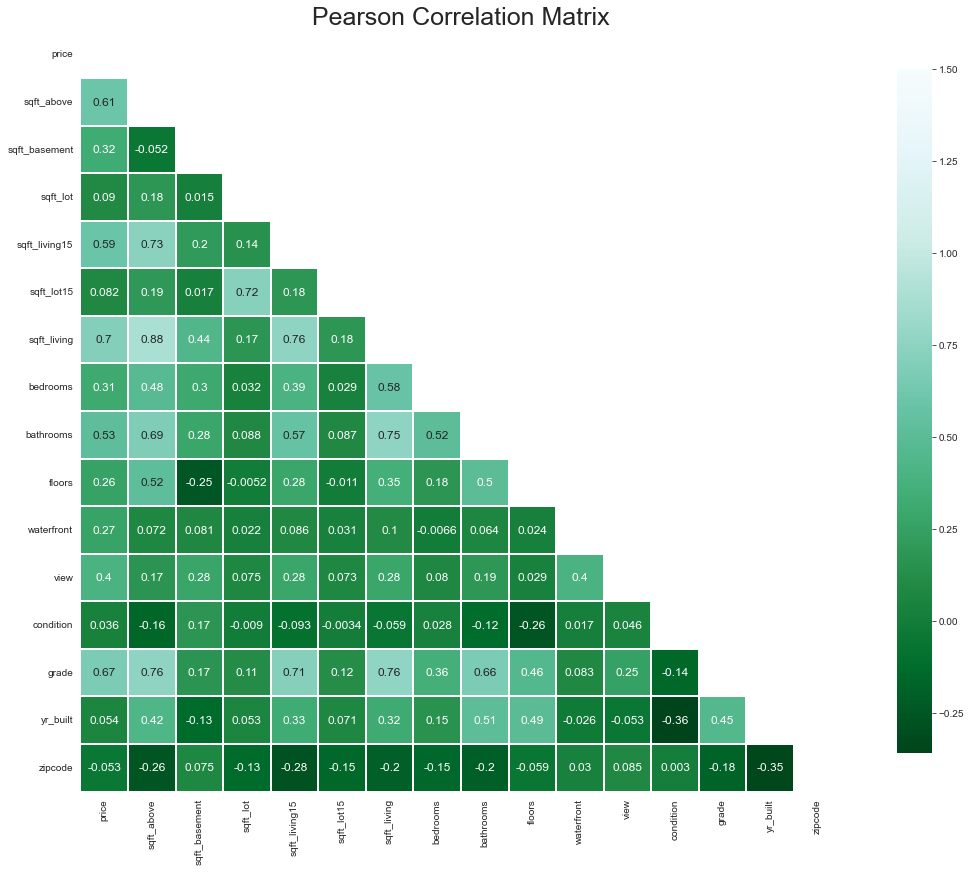

In [19]:
mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(20, 14))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.2,vmax=1.5,square=True, cmap="BuGn_r",
            linecolor='w',annot=True,annot_kws={"size":12},mask=mask,cbar_kws={"shrink": .9});

sqft_living and sqft_above display a multicolinearity, having a Pearson correlation of 0.88.

To a lesser extent, there was some multicollinearity between sqft_living and sqft_living15 (between the living space of the house in question and the 15 closest neighbors), as well as sqft_living and grade (0.77) and sqft_above and grade (0.76). With regard to the first relationship, sqft_living has a 0.70 correlation with the target variable, price, while sqft_above only has a 0.60 correlation; this suggests we should drop sqft_above. This may also remove the multicollinearity between sqft_above and grade. Considering the strength of the sqft_living variable, it would also make sense to drop sqft_living15. The grade variable has a strong correlation with price, so despite the collinearity with sqft_living, I'll leav it in for now. Finally, it just doesn't make logical sense to keep the neighbors' lot sizes if we're dropping their living space square footage; accordingly, we'll drop that variable (sqft_lot15), as well as the preceding three.

#Highly Correlated Columns

In [20]:
corr_matrix=df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

['sqft_above']

# plotting HISTOGRAM

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft

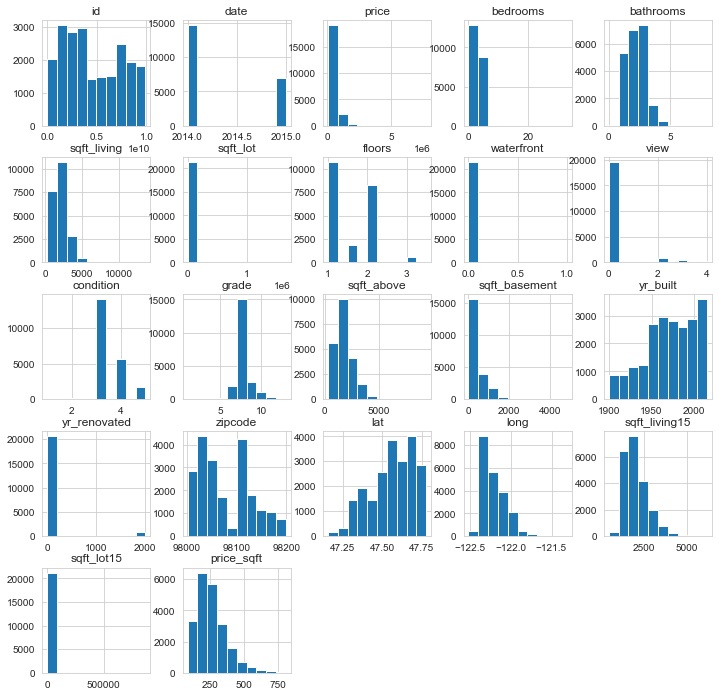

In [21]:
df.hist(figsize=(12,12))

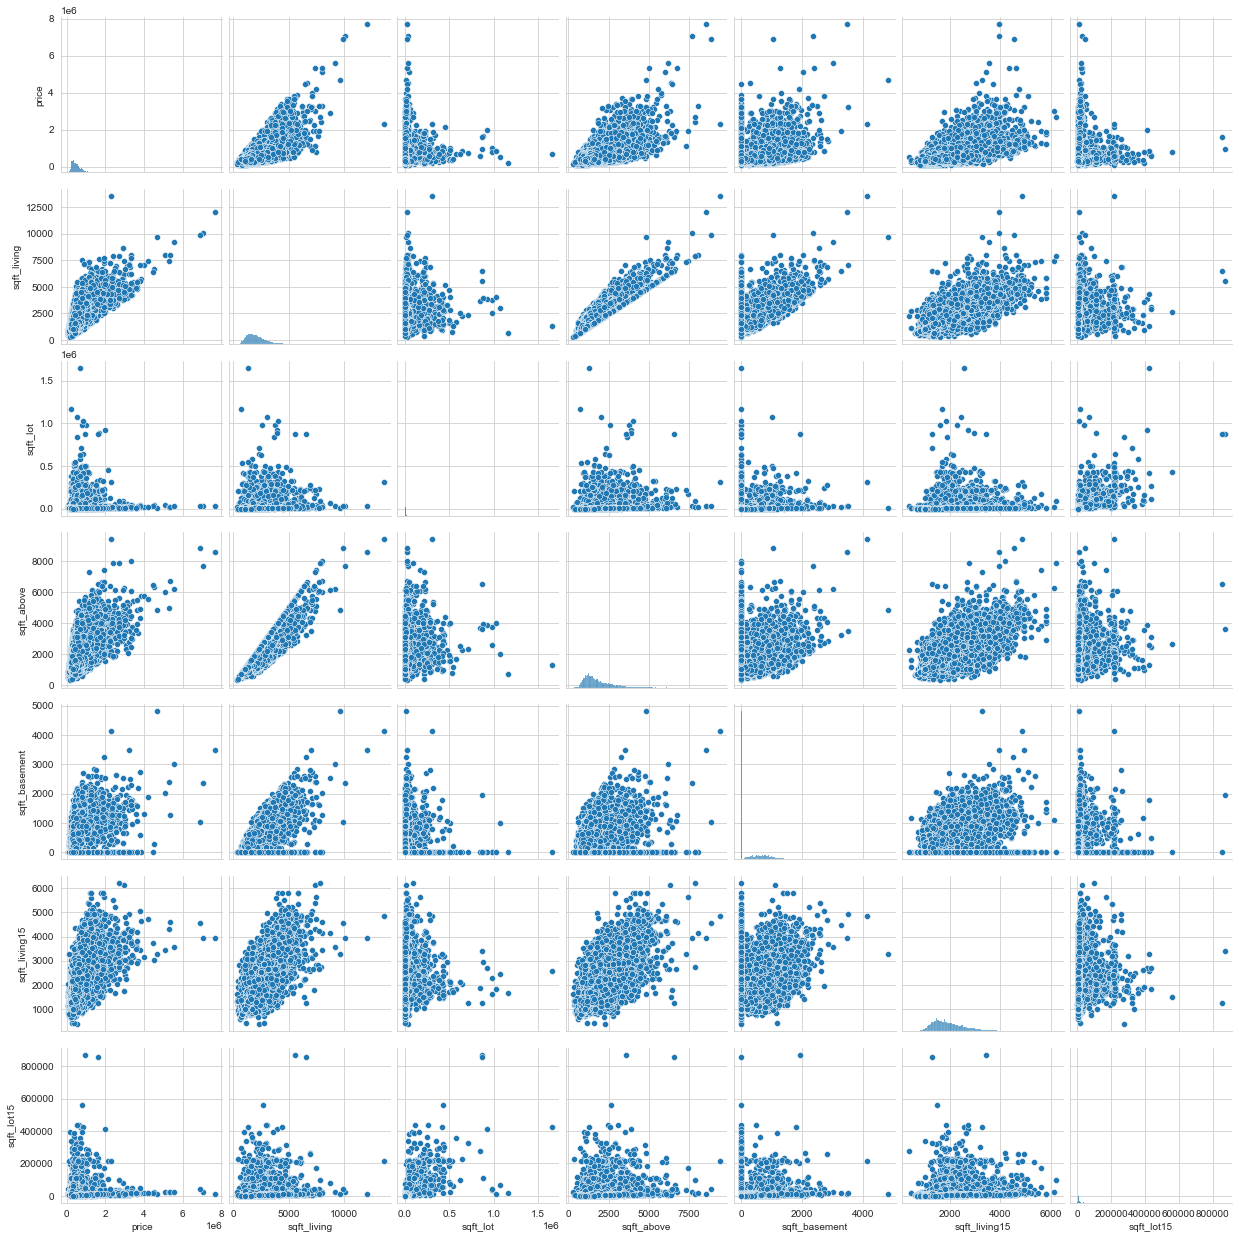

In [22]:
sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                 'sqft_living15', 'sqft_lot15']])
plt.show()

In [23]:
df.date = df.date.astype('string')
df.date

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: date, Length: 21613, dtype: string

In [24]:
df.date.value_counts()

2014    14633
2015     6980
Name: date, dtype: Int64

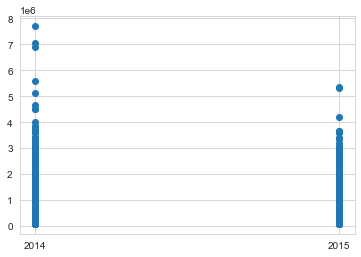

In [25]:
plt.scatter(x=df['date'], y=df['price'])
plt.show()

# Select numerical data

In [26]:
df_num = df._get_numeric_data()
df_num = df_num.drop(['id', 'lat', 'long', 'sqft_above', 'yr_renovated', 'sqft_basement'], axis=1)
df_num

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,price_sqft
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,98178,1340,5650,188.050847
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,98125,1690,7639,209.338521
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,98028,2720,8062,233.766234
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,98136,1360,5000,308.163265
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,98074,1800,7503,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,2009,98103,1530,1509,235.294118
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2014,98146,1830,7200,173.160173
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,2009,98144,1020,2007,394.216667
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,2004,98027,1410,1287,250.000000


# checking the distribution plot

/Users/antares/.pyenv/versions/mambaforge-4.10.1-4/envs/ih_DA_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

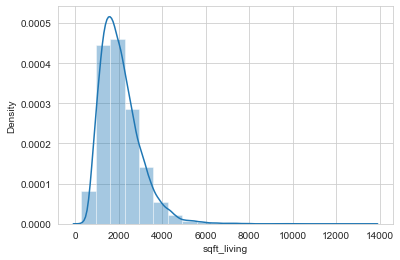

In [27]:
sns.distplot((df['sqft_living']), bins=20)


/Users/antares/.pyenv/versions/mambaforge-4.10.1-4/envs/ih_DA_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living15', ylabel='Density'>

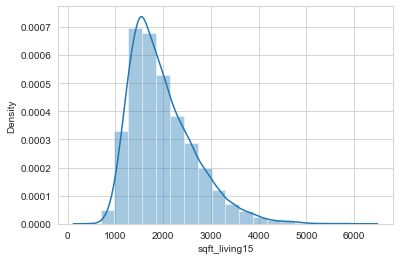

In [28]:
sns.distplot((df['sqft_living15']), bins=20)

/Users/antares/.pyenv/versions/mambaforge-4.10.1-4/envs/ih_DA_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yr_built', ylabel='Density'>

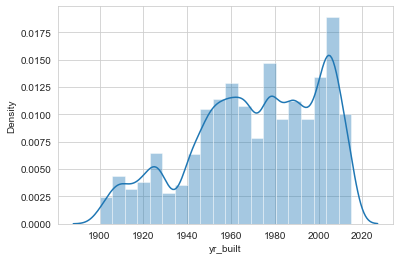

In [29]:
sns.distplot((df['yr_built']), bins=20)

# Data Transformation
Power Transformer: using power transformer to tranform the variable into normal distributionsas it is needed for modeling regression.

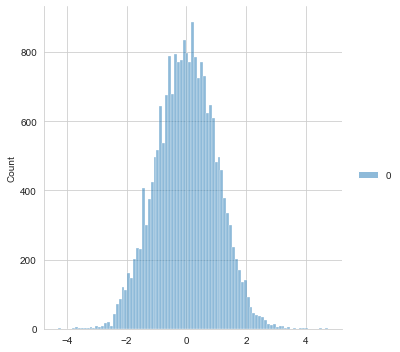

In [30]:
pt = PowerTransformer()
sqft_living_transformed=pt.fit_transform(df['sqft_living'].to_numpy().reshape(-1,1))
sns.displot(sqft_living_transformed)

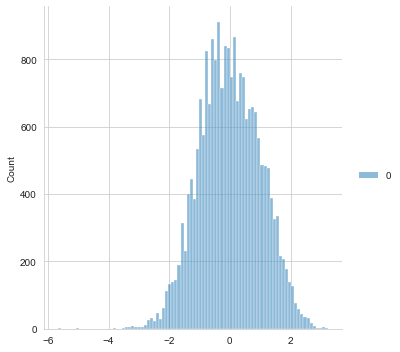

In [31]:
pt = PowerTransformer()
sqft_living_transformed=pt.fit_transform(df['sqft_living15'].to_numpy().reshape(-1,1))
sns.displot(sqft_living_transformed)

# X-y split (y is the target variable which is the Price)

In [32]:
target_d = ""
X = df_num.drop(["price"], axis=1)
y = df_num.price

In [33]:
X=X._get_numeric_data()
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,price_sqft
0,3,1.00,1180,5650,1.0,0,0,3,7,1955,98178,1340,5650,188.050847
1,3,2.25,2570,7242,2.0,0,0,3,7,1951,98125,1690,7639,209.338521
2,2,1.00,770,10000,1.0,0,0,3,6,1933,98028,2720,8062,233.766234
3,4,3.00,1960,5000,1.0,0,0,5,7,1965,98136,1360,5000,308.163265
4,3,2.00,1680,8080,1.0,0,0,3,8,1987,98074,1800,7503,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,2009,98103,1530,1509,235.294118
21609,4,2.50,2310,5813,2.0,0,0,3,8,2014,98146,1830,7200,173.160173
21610,2,0.75,1020,1350,2.0,0,0,3,7,2009,98144,1020,2007,394.216667
21611,3,2.50,1600,2388,2.0,0,0,3,8,2004,98027,1410,1287,250.000000


# Data Spliting

In [34]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

# Standardize

In [35]:
std_scaler=StandardScaler().fit(X_train) 
X_train_scaled=std_scaler.transform(X_train)
X_train.shape

(15129, 14)

In [36]:
X_test_scaled=std_scaler.transform(X_test)
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.39525584  1.79897315 -0.7722485  ... -0.89681057 -0.42678121
   0.1506006 ]
 [ 0.67295166  0.82545436  0.23203361 ... -0.11001675 -0.29405866
   1.57148831]
 [ 0.67295166 -0.47257069  0.53768469 ...  0.77876886 -0.1420146
   0.29227585]
 ...
 [-1.46346333 -1.44608948 -0.47751354 ... -0.29943008 -0.27780692
   0.44933937]
 [-0.39525584  1.14996062 -0.56484241 ... -0.66368647 -0.35238435
   1.32043222]
 [ 0.67295166  0.5009481   0.24294972 ...  0.18138837 -0.32168662
  -1.13380181]]
--------
[[ 0.67295166  0.5009481   0.45035581 ...  0.19595863 -0.09000902
  -0.45739076]
 [-1.46346333 -1.44608948 -0.65217129 ... -0.9842321  -0.3124773
   0.11443901]
 [-0.39525584  0.5009481   1.82578565 ...  1.78411652 -0.15628001
  -0.5043594 ]
 ...
 [ 0.67295166  1.14996062  1.1053224  ...  1.65298422  0.80961511
   0.11146997]
 [ 0.67295166 -0.47257069 -0.08453358 ... -0.80938903 -0.3153665
   0.0349893 ]
 [ 0.67295166  0.5009481   0.49402025 ... -0.03716547 -0.17773231
  -0.96206414]]


# Apply Linear Regression
# Modeling using Statsmodels

In [37]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     8376.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:27:24   Log-Likelihood:            -1.9888e+05
No. Observations:               15129   AIC:                         3.978e+05
Df Residuals:                   15114   BIC:                         3.979e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.392e+05   1007.367    535.241      0.0

In [38]:
predictions_test

array([564850.34406463, 384881.98552714, 892045.68380983, ...,
       856376.65641902, 529655.41874739, 462807.42401832])

In [39]:
#display adjusted R-squared
print(model.rsquared_adj)

0.8857204880799584


# Model Fitting

In [40]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

# model parameters ( b1,b2,b3,b4)

In [41]:
model.coef_

array([ -1067.56865411,  11582.37984809, 264073.23293036,  -5126.69886414,
        -8984.2410195 ,  23222.40567598,   9241.4247076 ,   3300.99745515,
        27678.06717915,  -8433.94113706,  -9859.23416915, -19998.30905838,
        -5595.79363536, 219318.68890732])

In [42]:
model.intercept_

539183.6821997483

In [43]:
y_pred=model.predict(X_test_scaled)   

y_pred_train=model.predict(X_train_scaled)

# Making prediction

In [44]:
y_pred_test=model.predict(X_test_scaled)   

y_pred_train=model.predict(X_train_scaled)

In [45]:
y_pred

array([564850.34406463, 384881.98552714, 892045.68380983, ...,
       856376.65641902, 529655.41874739, 462807.42401832])

In [46]:
y_pred_test

array([564850.34406463, 384881.98552714, 892045.68380983, ...,
       856376.65641902, 529655.41874739, 462807.42401832])

# Model testing

In [47]:
y_test

5506     532500.0
9279     410000.0
16034    782500.0
6608     995000.0
20359    279000.0
           ...   
1540     415000.0
14015    681000.0
5919     855000.0
10364    536500.0
18830    400000.0
Name: price, Length: 6484, dtype: float64

In [48]:
y_pred

array([564850.34406463, 384881.98552714, 892045.68380983, ...,
       856376.65641902, 529655.41874739, 462807.42401832])

In [49]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

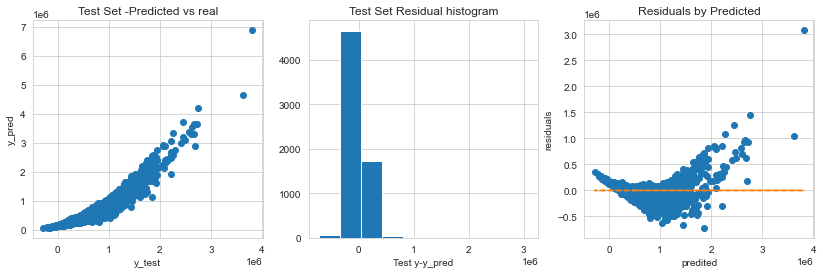

In [50]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

# using seaborn

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

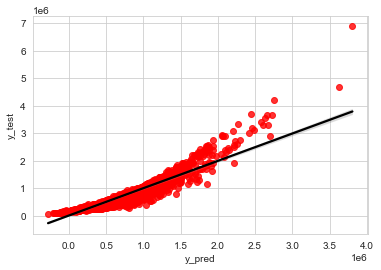

In [51]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

# Error metrics

# MSE

In [52]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

14287024344.689413
68746.68120007578


In [53]:
##prediction on the train set
mse(y_train,y_pred_train)

15337505510.749125

#  RMSE

In [54]:
rmse = mse(y_train,y_pred_train, squared = False)
rmse

123844.68301364062

# MAE mean absolute error

In [55]:
mae(y_pred_train, y_train)

68769.63522229691

# R2

In [56]:
R2=r2_score(y_test,y_pred)
R2

0.8947933358169373

# Adjusted R2

In [57]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [58]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.8945656509663324

# Getting the number of parameters

In [59]:
X_test.shape[1]

14

# Feature Importance

In [60]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [61]:
features_importances

,Attribute,Importance
2,sqft_living,264073.232930
13,price_sqft,219318.688907
8,grade,27678.067179
5,waterfront,23222.405676
11,sqft_living15,19998.309058
1,bathrooms,11582.379848
10,zipcode,9859.234169
6,view,9241.424708
4,floors,8984.241019
9,yr_built,8433.941137


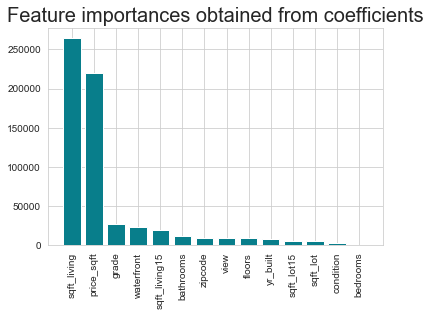

In [62]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()